<a href="https://colab.research.google.com/github/Bingyy/DeepLearning/blob/master/%E4%BB%8E%E5%A4%B4%E5%BC%80%E5%A7%8B%E5%AE%9E%E7%8E%B0%E7%8C%AB%E7%8B%97%E6%A3%80%E6%B5%8B%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 原始数据集中包含25000张猫狗图像，每个类别12500
# 现在需要创建新的数据集，包含三个子集：每个类别各1000个样本的训练集，
# 每个类别各500个样本的验证集以及每个类别各500个样本的测试集
# 共用了4000张图片

import os, shutil
ori_dataset_dir = './data/train'
base_dir = './data/cats_and_dogs_small'
if(not os.path.exists(base_dir)):
    os.mkdir(base_dir)

In [0]:
# 训练图像文件夹
train_dir = os.path.join(base_dir, 'train')
if(not os.path.exists(train_dir)):
    os.mkdir(train_dir)

# 验证图像文件夹
validation_dir = os.path.join(base_dir, 'validation')
if(not os.path.exists(validation_dir)):
    os.mkdir(validation_dir)

# 测试图像文件夹
test_dir = os.path.join(base_dir, 'test')
if(not os.path.exists(test_dir)):
    os.mkdir(test_dir)

# 猫的训练文件夹
train_cats_dir = os.path.join(train_dir, 'cats')
if(not os.path.exists(train_cats_dir)):
    os.mkdir(train_cats_dir)

# 狗的训练文件夹
train_dogs_dir = os.path.join(train_dir, 'dogs')
if(not os.path.exists(train_dogs_dir)):
    os.mkdir(train_dogs_dir)

# 猫的验证文件夹
validation_cats_dir = os.path.join(validation_dir, 'cats')
if(not os.path.exists(validation_cats_dir)):
    os.mkdir(validation_cats_dir)

# 狗的验证文件夹
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if(not os.path.exists(validation_dogs_dir)):
    os.mkdir(validation_dogs_dir)

# 猫的测试文件夹
test_cats_dir = os.path.join(test_dir, 'cats')
if(not os.path.exists(test_cats_dir)):
    os.mkdir(test_cats_dir)

# 狗的测试文件夹
test_dogs_dir = os.path.join(test_dir, 'dogs')
if(not os.path.exists(test_dogs_dir)):
    os.mkdir(test_dogs_dir)


In [0]:
# 将前1000张猫的图片复制到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将500张猫的图片复制到validation_cats_dir    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将500张图片复制到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将前1000张狗的图片复制到train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 将500张狗的图片复制到validation_cats_dir   
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 将500张图片复制到test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    


In [0]:
# 检查
print("training cat images: ", len(os.listdir(train_cats_dir)))

training cat images:  1000


In [0]:
print("training dog images: ", len(os.listdir(train_dogs_dir)))

training dog images:  1000


### 现在开始构建网络

这里需要增大网络。

网络中的特征图的深度在逐渐增大，而尺寸则在逐渐减小。本题是个二分类问题，所以最后一层用sigmoid激活函数，大小为1的Dense层。

In [0]:
from keras import layers
from keras import models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

# 展平后接入Dense层
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
          

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


### 数据预处理

现在模型也定义好了，原始数据也准备好了，但是在将数据填入模型之前，需要进行预处理才能使用，填入模型的是**浮点数张量**。而当前数据是以JPEG文件的形式保存在硬盘中，预处理步骤如下：

- 读取图像文件
- 将JPEG文件解码为RGB像素网格
- 将像素网格转化为浮点数张量
- 将像素值缩放到0~1区间

Keras提供了自动完成这些步骤的工具：`keras.preprocessing.image`，其中有一个`ImageDataGenerator`类，可以帮助我们快速创建Python生成器，将硬盘上的图像文件自动转换为预处理好的张量。

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
                train_dir, # 目标目录
                target_size=(150, 150), # 所有图像调整为150x150
                batch_size=20,
                class_mode='binary') # 二进制标签，我们用了binary_crossentropy损失函数
validation_generator = test_datagen.flow_from_directory(
                validation_dir, # 目标目录
                target_size=(150, 150), # 所有图像调整为150x150
                batch_size=20,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
os.listdir(train_dir)

['dogs', 'cats']

In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break # 一把就结束

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [0]:
# 使用批量生成器拟合模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 24s 241ms/step - loss: 0.6930 - acc: 0.5045 - val_loss: 0.6913 - val_acc: 0.5200
Epoch 2/30
100/100 [==============================] - 18s 178ms/step - loss: 0.6601 - acc: 0.6020 - val_loss: 0.6364 - val_acc: 0.6360
Epoch 3/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6119 - acc: 0.6695 - val_loss: 0.7093 - val_acc: 0.5800
Epoch 4/30
100/100 [==============================] - 16s 161ms/step - loss: 0.5705 - acc: 0.6850 - val_loss: 0.5977 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 16s 162ms/step - loss: 0.5319 - acc: 0.7290 - val_loss: 0.6242 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 18s 180ms/step - loss: 0.5011 - acc: 0.7525 - val_loss: 0.6031 - val_acc: 0.6640
Epoch 7/30
100/100 [==============================] - 16s 161ms/step - loss: 0.4768 - acc: 0.7680 - val_loss: 0.5834 - val_acc: 0.6810
Epoch 8/30
100/100 [==============================] - 1

In [0]:
model.save('cats_and_dogs_small_1.h5')

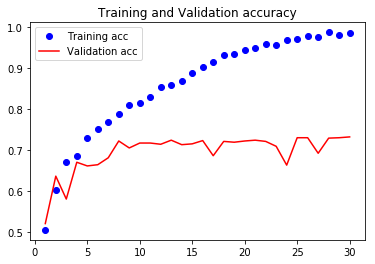

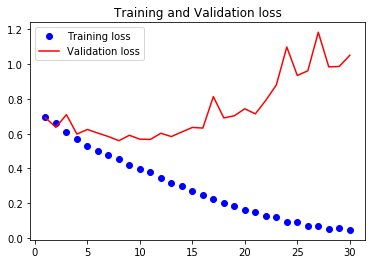

In [0]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

# 新加一个图
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### 结果分析

从这个图上可以看出模型过拟合了。训练精度逐渐增加至100%，但是验证精度则停留在70%~72%，且验证损失在5轮后就达到最小值，然后保持不变，最后反而在渐渐变大。

前面提到的降低过拟合的方法有dropout以及权重衰减（L1,L2正则），这里针对CV，我们先用**数据增强**来降低过拟合。

In [0]:
print('Hello world')

Hello world


In [0]:
# 数据增强增加学习样本
datagen = ImageDataGenerator(
    rotation_range=40, # 角度值，0~180，图像旋转
    width_shift_range=0.2, # 水平平移，相对总宽度的比例
    height_shift_range=0.2, # 垂直平移，相对总高度的比例
    shear_range=0.2, # 随机错切换角度
    zoom_range=0.2, # 随机缩放范围
    horizontal_flip=True, # 一半图像水平翻转
    fill_mode='nearest' # 填充新创建像素的方法
)

In [0]:
from keras.preprocessing import image # 图像预处理模块

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # 选择一张图片进行增强
img = image.load_img(img_path, target_size=(150, 150)) # 读取图像并调整大小
x = image.img_to_array(img) # 形状转换为(150,150,3)的Numpy数组
x = x.reshape((1,) + x.shape)

In [0]:
x.shape

(1, 150, 150, 3)

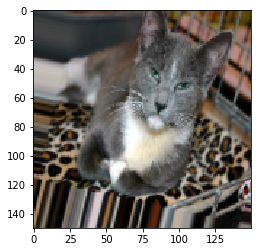

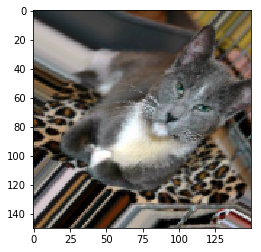

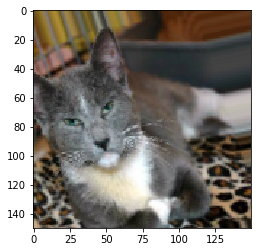

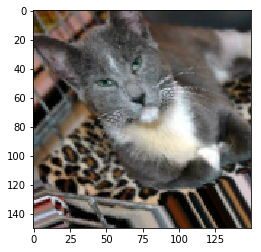

In [0]:
i = 0
# 生成随机变换后图像批量，循环是无限生成，也需要我们手动指定终止条件
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()
    

只是使用这种数据增强是不够的，因为这是对信息的混合，而不是添加新信息。我们现在再加入dropout来降低过拟合。

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [0]:
# 训练
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255) # 验证集不用增强

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 46s 456ms/step - loss: 0.6749 - acc: 0.5750 - val_loss: 0.6428 - val_acc: 0.6041
Epoch 2/100
100/100 [==============================] - 42s 420ms/step - loss: 0.6471 - acc: 0.6103 - val_loss: 0.6161 - val_acc: 0.6643
Epoch 3/100
100/100 [==============================] - 41s 407ms/step - loss: 0.6224 - acc: 0.6422 - val_loss: 0.6002 - val_acc: 0.6859
Epoch 4/100
100/100 [==============================] - 42s 416ms/step - loss: 0.6032 - acc: 0.6669 - val_loss: 0.5736 - val_acc: 0.7094
Epoch 5/100
100/100 [==============================] - 42s 421ms/step - loss: 0.5914 - acc: 0.6812 - val_loss: 0.5739 - val_acc: 0.6961
Epoch 6/100
100/100 [==============================] - 42s 416ms/step - loss: 0.5864 - acc: 0.6891 - val_loss: 0.5867 - val_acc: 0.6765
Epoch 7/100
100/100 [==============================] - 41s 413ms/step - loss: 0.5798 - acc: 0.6906 - val_loss: 0.5766 - val_acc: 0.6846
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 41s 407ms/step - loss: 0.4256 - acc: 0.8081 - val_loss: 0.4403 - val_acc: 0.7854
Epoch 62/100
100/100 [==============================] - 41s 406ms/step - loss: 0.4105 - acc: 0.8106 - val_loss: 0.4767 - val_acc: 0.7627
Epoch 63/100
100/100 [==============================] - 43s 428ms/step - loss: 0.4211 - acc: 0.8031 - val_loss: 0.4745 - val_acc: 0.7674
Epoch 64/100
100/100 [==============================] - 39s 394ms/step - loss: 0.4050 - acc: 0.8147 - val_loss: 0.4647 - val_acc: 0.7803
Epoch 65/100
100/100 [==============================] - 36s 364ms/step - loss: 0.4107 - acc: 0.8078 - val_loss: 0.4529 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 34s 343ms/step - loss: 0.4137 - acc: 0.8034 - val_loss: 0.4574 - val_acc: 0.7796
Epoch 67/100
100/100 [==============================] - 36s 355ms/step - loss: 0.4099 - acc: 0.8181 - val_loss: 0.4761 - val_acc: 0.7830
Epoch 68/100
100/100 [===================

In [0]:
model.save('cats_and_dogs_small_2.h5')

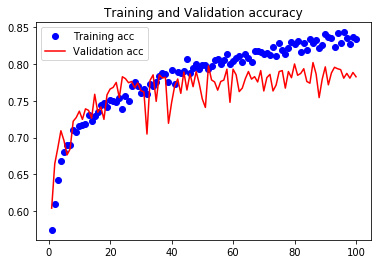

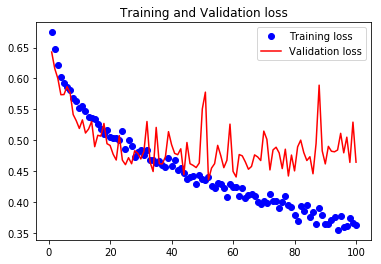

In [0]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

# 新加一个图
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

此时的结果显示，使用数据增强和dropout后，模型不再过拟合，训练曲线紧紧跟随着验证曲线。精度约为80%，比之前的73%提高了不少。

再进一步调节网络参数和使用正则化方法，比如L2正则化我们可以再提高网络的精度，但是也只能达到约86%，87%附近，再提高就很困难了。因为可用数据量太少。

In [0]:
print("END")

END
